In [1]:
# import pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

print(torch.__version__)


2.5.1


In [2]:
# Optional to run code on GPU
# Check if CUDA is available and if device is GPU
print('Cuda Available : {}'.format(torch.cuda.is_available()))
print('GPU - {0}'.format(torch.cuda.get_device_name())) if torch.cuda.is_available() else None

# Note:
# If this gives you an error on Google colab, go into 'Additional connection otions' > 'Change runtime type' > Select a GPU as the Hardware Accelerator
# If you're running code on your machine locally, your machine needs have a GPU supported graphics card and CUDA installed.

Cuda Available : False


### Here's a great beginner tutorial for reference on how to train a classifier with PyTorch on image data: [Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

# Q3

In [3]:
# Load MNIST dataset
mnist_train = datasets.MNIST('data', train=True, download=True)
mnist_test = datasets.MNIST('data', train=False, download=True)

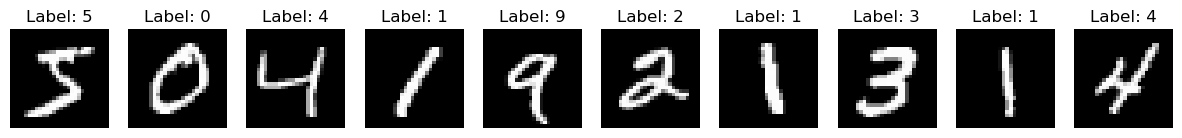

In [4]:
# visualise the dataset

import matplotlib.pyplot as plt

# Define a function to visualize images and their labels
def visualize_samples(dataset, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        image, label = dataset[i]
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Visualize samples from the training set
visualize_samples(mnist_train)

In [5]:
# Check MNIST statistics
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(mnist_train.data.min(), mnist_train.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(mnist_train.data.float().mean(), mnist_train.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(mnist_train.data.float().mean() / 255, mnist_train.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


In [6]:
# normalize and prepare data for training the model

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the pixel values
])

# TODO: Load MNIST training dataset with transformations

training_set = datasets.MNIST('data', train=True, transform=transform)
test_set = datasets.MNIST('data', train=False, transform=transform)

# TODO: Split dataset into training, validation, and test sets

training_set, validation_set = random_split(training_set, [0.7, 0.3])

# TODO: Define data loaders
train_loader = DataLoader(training_set, batch_size=64, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=64)
test_loader = DataLoader(test_set, batch_size=64)

In [7]:
# TODO: Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        #TODO: define the layers of the model here
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(in_features=128 * 14 * 14, out_features=10)
        
    def forward(self, x):
        #TODO: pass the data through each layer of the model here
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x, inplace=True)
        x = self.conv3(x)
        x = nn.functional.relu(x, inplace=True)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [8]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Initialize model
model = MLP()

# TODO: Define the following for your model
# loss function
# learning rate
# optimizer
# number of epochs to train the model

num_epochs = 5
lr = 5e-4
optimiser = optim.Adam(model.parameters(), lr = lr)
criterion = nn.CrossEntropyLoss()

training_losses = []
validation_accuracy = []
epochs = [i + 1 for i in range(num_epochs)]


# Training loop
for epoch in range(num_epochs):
    # TODO: train the model
      # get the inputs from train data loader
      # zero the parameter gradients
      # forward pass through the model
      # backward propagation + optimize
      # print statistics

      running_loss = 0.0

      for i, data in enumerate(train_loader):
        inputs, labels = data

        optimiser.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()

      print(f'Epoch [{epoch + 1}/{num_epochs}] Training Loss: {running_loss / len(train_loader)}')

      training_losses.append(running_loss / len(train_loader))

    # TODO: Validate the model
    # get inputs from validation data loader
    # forward pass + get predicted outputs
    # calculate accuracy of predictions
    # print statistics

      accuracy = 0.0
      with torch.no_grad():
        for i, data in enumerate(val_loader):
          inputs, labels = data

          outputs = model(inputs)

          _, predictions = torch.max(outputs, dim=1)

          accuracy += accuracy_score(labels, predictions, normalize=True)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Accuracy: {100 * accuracy / len(val_loader)} %')

      validation_accuracy.append(100 * accuracy / len(val_loader))


Epoch [1/5] Training Loss: 0.15587761366167183
Epoch [1/5], Validation Accuracy: 98.19370567375887 %
Epoch [2/5] Training Loss: 0.049946023737430525
Epoch [2/5], Validation Accuracy: 98.79210992907801 %
Epoch [3/5] Training Loss: 0.03214081758356836
Epoch [3/5], Validation Accuracy: 98.29898049645391 %
Epoch [4/5] Training Loss: 0.022203012784335924
Epoch [4/5], Validation Accuracy: 98.62034574468085 %
Epoch [5/5] Training Loss: 0.015592901010926629
Epoch [5/5], Validation Accuracy: 98.80873226950355 %


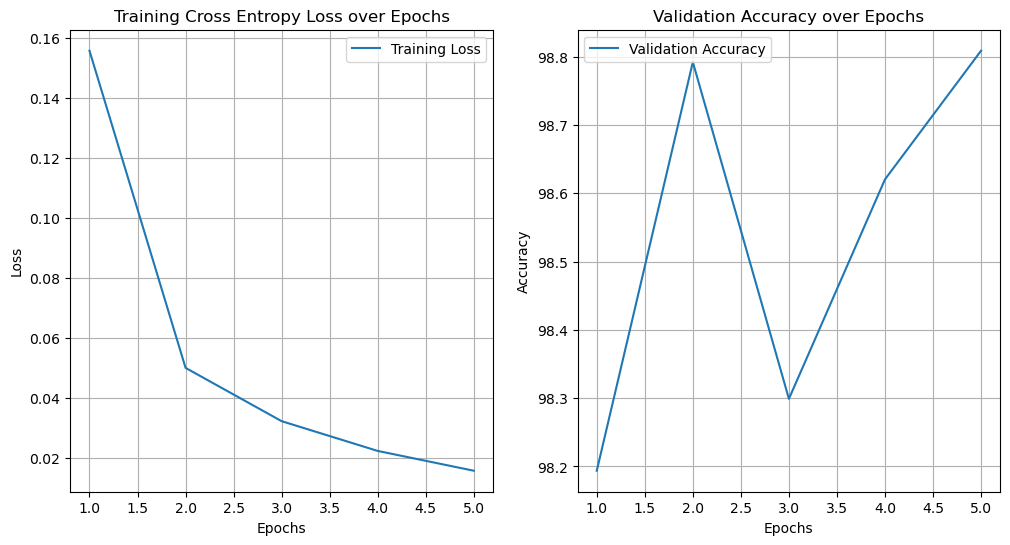

In [9]:
# TODO: Show loss and accuracy plots

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(epochs, training_losses, label='Training Loss')

plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training Cross Entropy Loss over Epochs')

plt.subplot(1, 2, 2)

plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Validation Accuracy over Epochs')

plt.show()


In [10]:
# TODO: Evaluate the model on the test data
  # get inputs from test data loader
      # forward pass + get predicted outputs
      # calculate accuracy of predictions
      # print statistics

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total} %')

Test Accuracy: 98.93 %


# Q4

In [11]:
weight_matrix = model.fc.weight.data

print(weight_matrix.shape)


torch.Size([10, 25088])


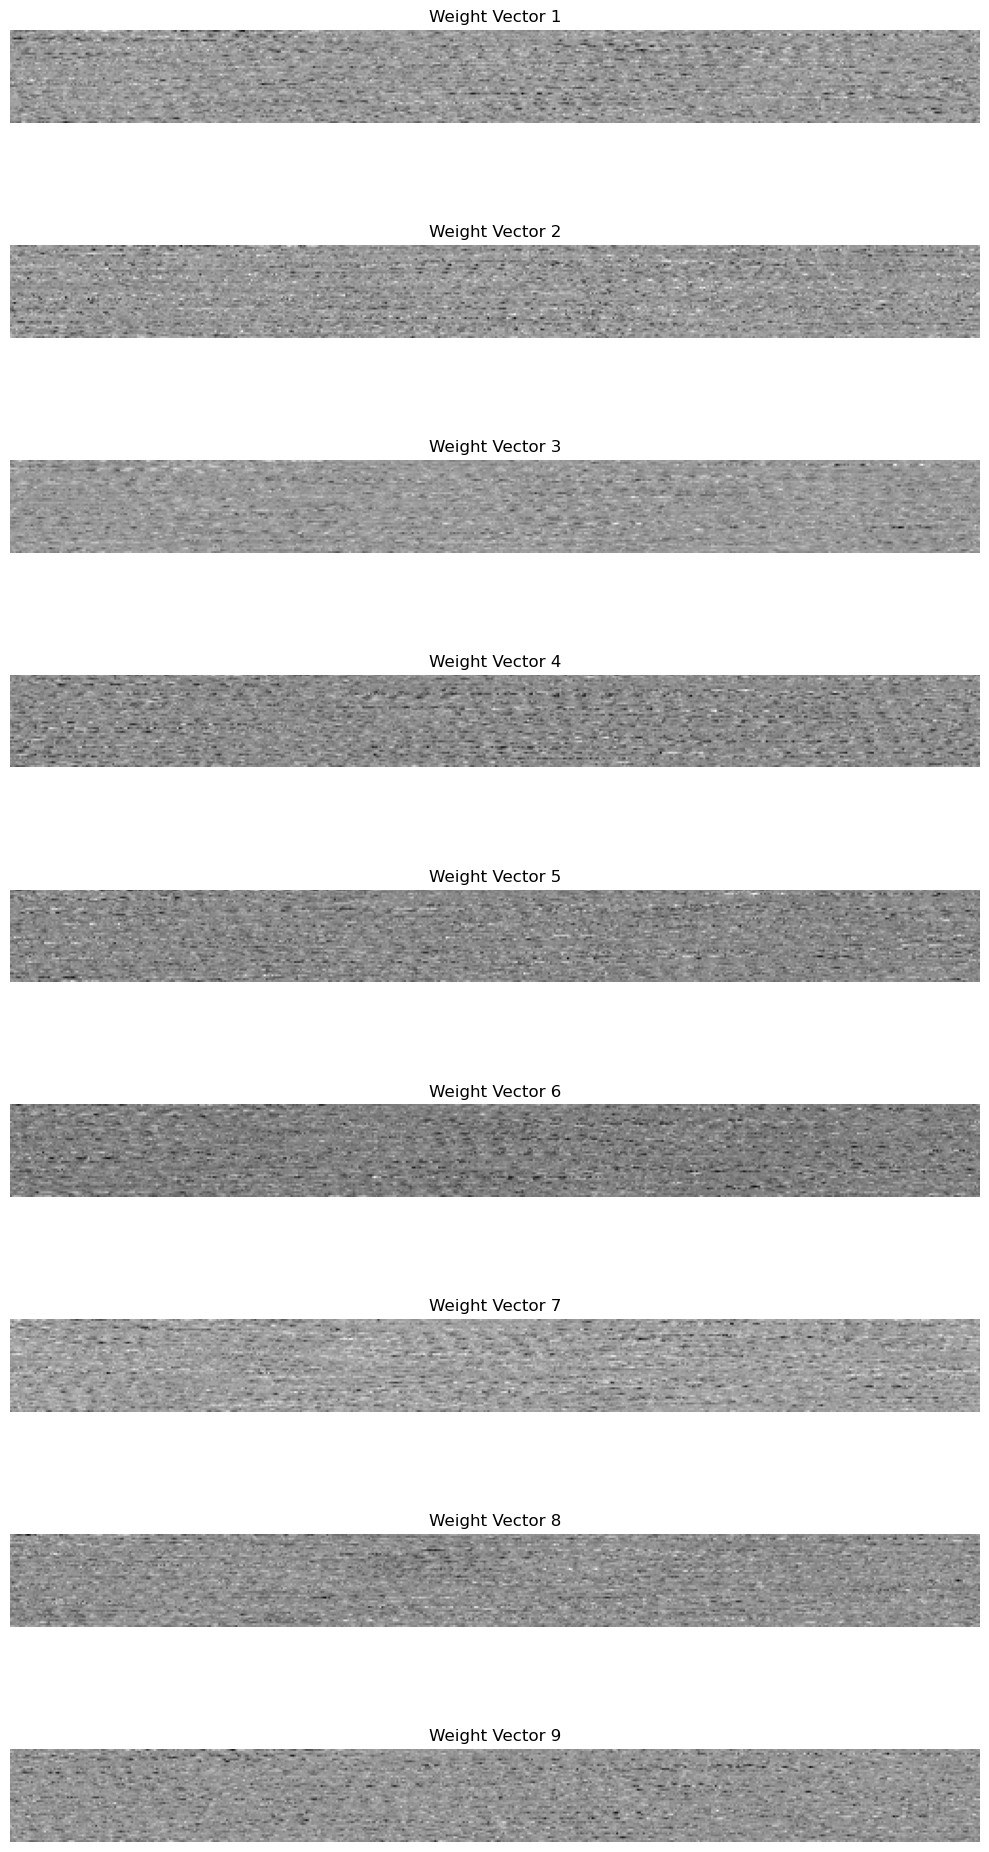

In [12]:
# TODO: Extract the weight matrix of the first hidden layer

# Only fully connected layers were allowed, but I accidentally used a CNN

weight_matrix = model.fc.weight.data

mean, std = torch.mean(weight_matrix[:, :]), torch.std(weight_matrix[:, :])

# TODO: Normalize each row of the weight matrix to [0, 1]
normalized_weight_matrix = (weight_matrix - mean) / std

# Visualize the first 9 rows of the normalized weight matrix
num_rows_to_visualize = 9
fig, axes = plt.subplots(num_rows_to_visualize, 1, figsize=(10, 20))
for i in range(num_rows_to_visualize):
    axes[i].imshow(normalized_weight_matrix[i].reshape(7 ** 2, 2 ** 9), cmap='gray')
    axes[i].set_title(f'Weight Vector {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()